# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [12]:
app_train['AGE'] = app_train['DAYS_BIRTH']/365
app_train['AGE'].describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: AGE, dtype: float64

In [15]:
app_train["equal_freq_age"] = pd.qcut(app_train["AGE"], 8)

In [22]:
app_train["equal_freq_age"].value_counts()

(20.517, 29.148]    38451
(43.151, 48.282]    38448
(34.008, 38.649]    38445
(48.282, 53.923]    38439
(29.148, 34.008]    38433
(59.584, 69.121]    38432
(38.649, 43.151]    38432
(53.923, 59.584]    38431
Name: equal_freq_age, dtype: int64

In [25]:
import seaborn as sns

age_groups = app_train.groupby('equal_freq_age')
age_groups.describe()


SK_ID_CURR                                          \
                      count           mean            std       min   
equal_freq_age                                                        
(20.517, 29.148]    38451.0  277643.501209  102437.618508  100002.0   
(29.148, 34.008]    38433.0  277572.268493  103201.947977  100023.0   
(34.008, 38.649]    38445.0  278362.619014  102653.633449  100009.0   
(38.649, 43.151]    38432.0  278550.166502  102657.281486  100012.0   
(43.151, 48.282]    38448.0  278380.008479  103191.676327  100003.0   
(48.282, 53.923]    38439.0  278260.726970  102952.020877  100004.0   
(53.923, 59.584]    38431.0  278858.199318  102836.802724  100007.0   
(59.584, 69.121]    38432.0  277816.798319  102389.355150  100027.0   

                                                             TARGET            \
                        25%       50%        75%       max    count      mean   
equal_freq_age                                                                  
(20.517, 29.148]  188974.50  277259.0  365581.00  456251.0  38451.0  0.114873   
(29.148, 34.008]  188219.00  276543.0  367528.00  456254.0  38433.0  0.104988   
(34.008, 38.649]  190433.00  277871.0  367949.00  456245.0  38445.0  0.093510   
(38.649, 43.151]  190092.50  278800.0  367059.25  456253.0  38432.0  0.079647   
(43.151, 48.282]  188505.75  278528.0  367470.00  456255.0  38448.0  0.076077   
(48.282, 53.923]  188677.00  278897.0  367793.50  456242.0  38439.0  0.070423   
(53.923, 59.584]  189578.00  279138.0  367714.50  456252.0  38431.0  0.056829   
(59.584, 69.121]  188898.00  278508.5  366143.25  456249.0  38432.0  0.049464   

                  ... AMT_REQ_CREDIT_BUREAU_YEAR            AGE             \
                  ...                        75%   max    count       mean   
equal_freq_age    ...                                                        
(20.517, 29.148]  ...                        3.0  22.0  38451.0  26.116277   
(29.148, 34.008]  ...                        3.0  19.0  38433.0  31.583626   
(34.008, 38.649]  ...                        3.0  21.0  38445.0  36.406146   
(38.649, 43.151]  ...                        3.0  23.0  38432.0  40.855931   
(43.151, 48.282]  ...                        3.0  17.0  38448.0  45.627979   
(48.282, 53.923]  ...                        3.0  19.0  38439.0  51.145710   
(53.923, 59.584]  ...                        3.0  16.0  38431.0  56.678516   
(59.584, 69.121]  ...                        3.0  25.0  38432.0  63.091590   

                                                                        \
                       std        min        25%        50%        75%   
equal_freq_age                                                           
(20.517, 29.148]  2.160592  20.517808  24.367123  26.635616  27.939726   
(29.148, 34.008]  1.385595  29.150685  30.397260  31.594521  32.761644   
(34.008, 38.649]  1.330893  34.010959  35.265753  36.454795  37.556164   
(38.649, 43.151]  1.299486  38.652055  39.720548  40.830137  41.975342   
(43.151, 48.282]  1.491629  43.153425  44.309589  45.600000  46.909589   
(48.282, 53.923]  1.655300  48.284932  49.698630  51.183562  52.605479   
(53.923, 59.584]  1.643531  53.926027  55.216438  56.660274  58.073973   
(59.584, 69.121]  2.330047  59.586301  61.095890  62.857534  64.723288   

                             
                        max  
equal_freq_age               
(20.517, 29.148]  29.147945  
(29.148, 34.008]  34.008219  
(34.008, 38.649]  38.649315  
(38.649, 43.151]  43.150685  
(43.151, 48.282]  48.282192  
(48.282, 53.923]  53.923288  
(53.923, 59.584]  59.583562  
(59.584, 69.121]  69.120548  

[8 rows x 880 columns]

D:\Program Files (x86)\brand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


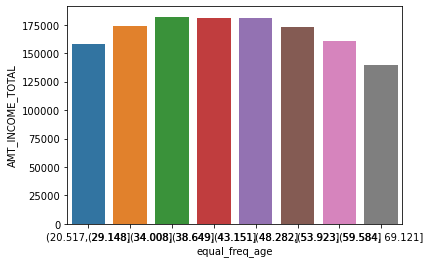

In [26]:

x = age_groups.mean().index
y = age_groups.mean()['AMT_INCOME_TOTAL']

sns.barplot(x,y)
plt.show()